# Practice Exercise 4.9 Installing and Importing Visualization Libraries

## This script contains the following points:

#### 1. Import libraries
#### 2. Import data
#### 3. Creating bar charts
#### 4. Exporing charts
#### 5. Creating histograms and scatterplots
#### 6. Creating line charts and sampling data
#### 7. Export data

# 01 Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
# import data
path = r'H:\CF\Immersion into Data Analystics\4 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
path

'H:\\CF\\Immersion into Data Analystics\\4 Python Fundamentals for Data Analysts\\Instacart Basket Analysis'

In [4]:
df_insta = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_frequency.pkl'))

# 03 Creating Bar Charts

<AxesSubplot:>

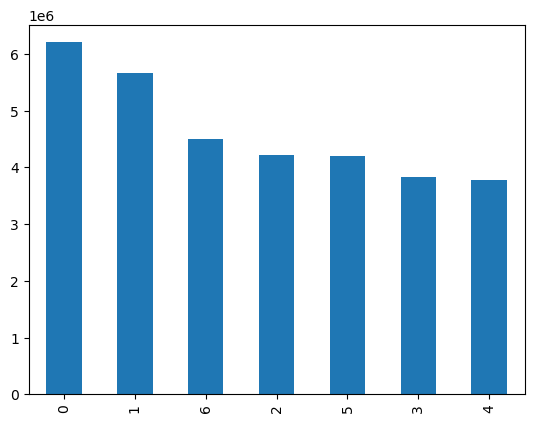

In [5]:
# create bar chart for 'orders day of week'
df_insta['orders_day_of_week'].value_counts().plot.bar()

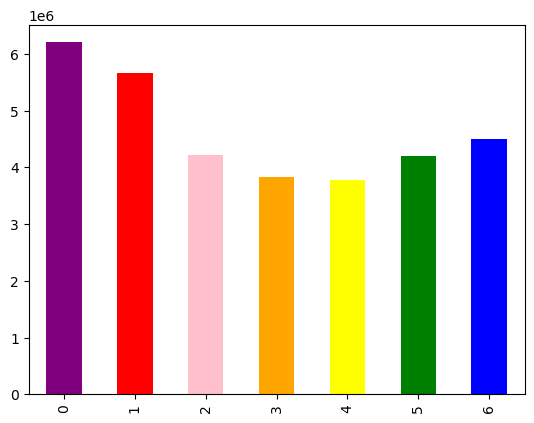

In [6]:
bar = df_insta['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow','green','blue'])

# 04 Exporting Charts

In [7]:
# exporting figure
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 05 Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

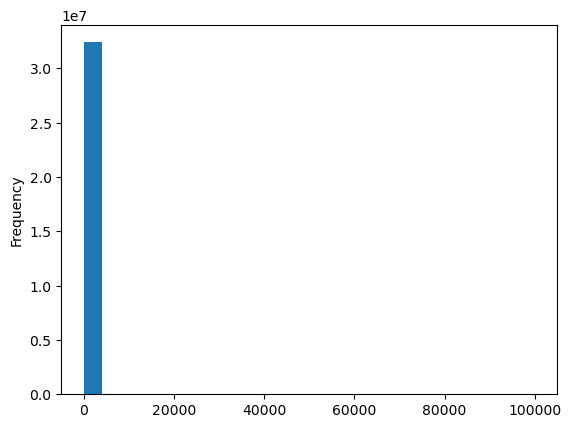

In [8]:
# create histogram of 'prices'
df_insta['prices'].plot.hist(bins =25)

In [9]:
# checking 'prices' data
df_insta['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [10]:
df_insta['prices'].mean()

11.980225638467232

In [11]:
df_insta['prices'].median()

7.4

In [12]:
df_insta['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

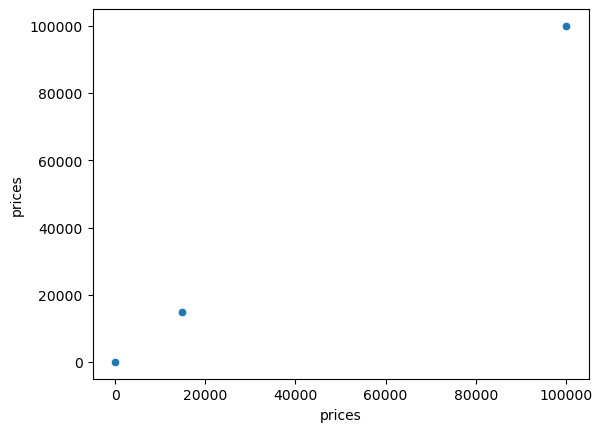

In [13]:
# creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_insta)

In [14]:
# looking for high prices
df_insta.loc[df_insta['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,14900.0,High range product,Regular days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,14900.0,High range product,Regular days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,14900.0,High range product,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular Customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,14900.0,High range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular Customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,14900.0,High range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,99999.0,High range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,99999.0,High range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,99999.0,High range product,Slowest days,Average orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,99999.0,High range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular Customer


In [15]:
# replacing prices over 100 with NaN
df_insta.loc[df_insta['prices'] >100, 'prices'] = np.nan

In [16]:
# checking output
df_insta['prices'].max()

25.0

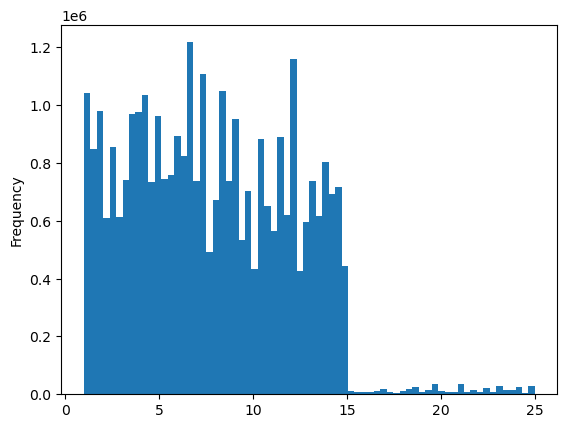

In [17]:
# recreating histogram
hist = df_insta['prices'].plot.hist(bins = 70)

# 06 Creating Line Charts and Sampling Data

In [18]:
# Create a list holding True/False values to test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_insta)) <= 0.7

In [19]:
# store 70% of the sample in the dataframe big
big = df_insta[dev]

In [20]:
# Store 30% of the sample in the dataframe small
small = df_insta[~dev]

In [21]:
len(df_insta)

32404859

In [22]:
len(big)

22683761

In [23]:
len(small)

9721098

In [24]:
len(big) + len(small)

32404859

In [25]:
# creating new dataframe with only columns necessary
df_insta2 = small[['orders_day_of_week', 'prices']]

In [26]:
df_insta2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


In [27]:
df_insta2.shape

(9721098, 2)

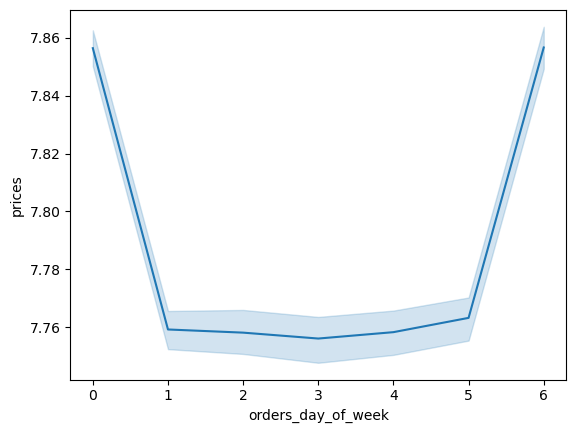

In [28]:
line = sns.lineplot(data = df_insta2, x = 'orders_day_of_week', y = 'prices')

# 07 Exporting Data

In [30]:
df_insta.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data.pkl'))